# Modelado Matemático - Introducción a la estadística bayesiana

**Carlos Andrés Bautista Torres**

código: 2208057

<img src="auxiliares\portada.jpg" width="100%" align="center" >


### _*En este notebook se realiza con el fin de interiorizar el concepto de estadística bayesiana, y para ello se encontrará la ecuación de la recta apropiada para modelar un conjunto de datos (puntos) que se obtienen artificialmente.*_



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import leastsq

### _*Se definen las funciones que permitirán generar los valores aleatorios ligados a una recta $y = mx + b$.*_

In [2]:
def funcline(params,x): # Crea una recta.
    return params[0]*x+params[1]


def Errorlineal(tpl,x,y): # Calcula la diferencia entre datos y modelo para calcular el chi^2.
    return funcline(tpl,x)-y


def graficalineal(x,y): # Calcula la mejor tupla (m,b) y grafica la recta con dichos valores.
    p0 = [0,0]
    bestt,suss = leastsq(Errorlineal, p0, args=(x,y))
    y2 = funcline(bestt,x)
    plt.plot(x,y, "or")
    plt.plot(x,y2, ":k")
    print(bestt[0], bestt[1])

In [3]:
x = np.arange(0,10,1)
tpl = [2,0.1]

np.random.seed(1)
error = np.random.randint(1,10,10) # Desde 1 para que al calcular el chi^2 no de una indeterminación.
ruido = np.random.normal(0,1,10)

y = funcline(tpl, x)
y_ruido = y + ruido

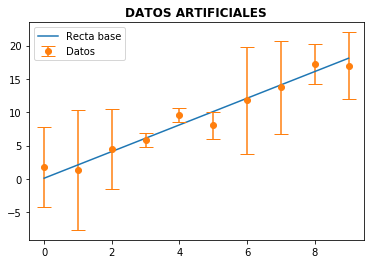

In [4]:
plt.plot(x,y, label="Recta base")
plt.errorbar(x,y_ruido, error,capsize=7, fmt='o',label="Datos")
plt.title("DATOS ARTIFICIALES", fontweight="bold")
plt.legend()


1.8812463680832587 0.6126560864239234


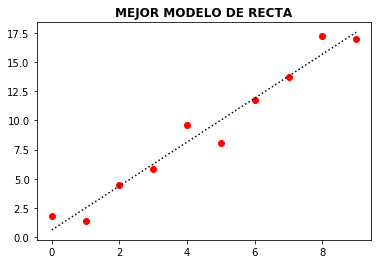

In [5]:
plt.title("MEJOR MODELO DE RECTA", fontweight="bold")
graficalineal(x,y_ruido)

In [6]:
best_m = 1.8812463680832587
best_b = 0.6126560864239234

### _*Basandonos en los resultados de la mejor pendiente y el mejor intercepto, se crea una malla para el espacio de parámetros (m,b) y observar donde se encuentran los valores más bajos para $\chi^2$.*_ 

In [7]:
b_list = np.arange(-5,7,0.5)
m_list = np.arange(-2,6,0.5)

chi2 = np.zeros((b_list.size,m_list.size))

for i in range(b_list.size):
    for j in range(m_list.size):
        
        y_model = m_list[j]*x + b_list[i]
        
        chi2[i,j] = (((y_model-y_ruido)/error)**2).sum() 
        

Text(0.5, 1.0, '$\\chi^2$ en el espacio de parámetros (m,b)')

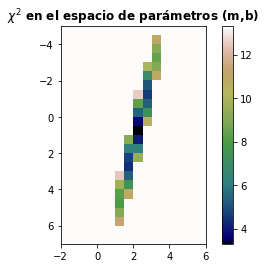

In [21]:
plt.imshow(chi2,vmax=13.3, extent=[-2,6,7,-5], cmap="gist_earth")
# Usé "extent" porque no pude simplificar las expresiones de ticks.
plt.colorbar()
plt.title("$\chi^2$ en el espacio de parámetros (m,b)", fontweight="bold")

### <span style = 'color:green'> DISTRIBUCIÓN DE PROBABILIDAD
    
### _*A partir de este punto ya se puede encontrar la distribución de probabilidad, considerando la siguiente relación:*_

$P\left(x_k|\mu,\sigma,H\right) \propto \exp\left[-\dfrac{(x_k -\mu)^2}{2\sigma^2}\right]\:,$

### _*en donde, por definición, $\chi^2 =\dfrac{(x_k -\mu)^2}{\sigma^2},$ y $\sigma$ es el "peso" de cada diferencia, dado por las barras de error.*_

In [9]:
like = np.exp(-chi2/2)
pt = like.sum()

Text(0.5, 1.0, 'distribución de probabilidad')

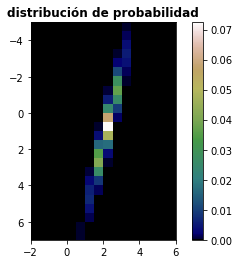

In [16]:
like = like/pt
plt.imshow(like, extent=[-2,6,7,-5], cmap="gist_earth")
plt.colorbar()
plt.title("distribución de probabilidad", fontweight="bold")

### <span style = 'color:green'> MARGINALIZACIÓN

### _*Consiste en reducir la dimensión del espacio de parámetro para poder observar el comportamiento de cada uno de ellos por separado,*_

$P(x|H) = \int P(x,y|H)dy\:\:.$

### _*En este caso $x\rightarrow m$ y $y\rightarrow b$.*_

Text(0.5, 1.0, 'Distribución de probabilidad para el intercepto')

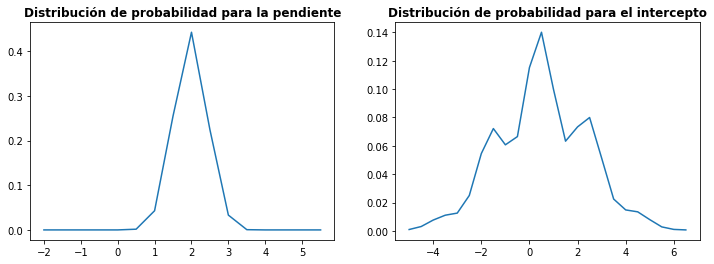

In [11]:
prob_m = like.sum(axis=0)
prob_m.size

prob_b = like.sum(axis=1)
prob_b.size


fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(m_list,prob_m)
plt.title("Distribución de probabilidad para la pendiente", fontweight="bold")

plt.subplot(1,2,2)
plt.plot(b_list,prob_b)
plt.title("Distribución de probabilidad para el intercepto", fontweight="bold")


### <span style = 'color:green'> MEJORANDO LA RESOLUCIÓN DE LA MALLA

### _*Según las gráficas anteriores el intervalo tomado para las pendientes es amplio, pues la función de distribución decae rápidamente. Sin embargo, la función de distribución para el intercepto hay que ampliarlo.*_

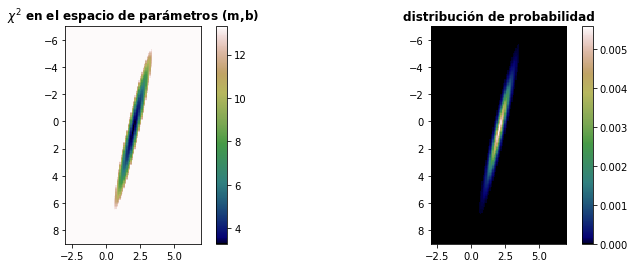

In [12]:
b_list2 = np.arange(-7,9,0.1)
m_list2 = np.arange(-3,7,0.1)

chi22 = np.zeros((b_list2.size,m_list2.size))

for i in range(b_list2.size):
    for j in range(m_list2.size):
        
        y_model = m_list2[j]*x + b_list2[i]
        
        chi22[i,j] = (((y_model-y_ruido)/error)**2).sum() 


like2 = np.exp(-chi22/2)
pt2 = like2.sum()
like2 = like2/pt2

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,4))

plt.subplot(1,2,2)
plt.imshow(like2, extent=[-3,7,9,-7], cmap="gist_earth")
plt.title("distribución de probabilidad", fontweight="bold")
plt.colorbar()

plt.subplot(1,2,1)
plt.imshow(chi22,vmax=13.3, extent=[-3,7,9,-7], cmap="gist_earth")
plt.title("$\chi^2$ en el espacio de parámetros (m,b)", fontweight="bold")
plt.colorbar()

Text(0.5, 1.0, 'Distribución de probabilidad para el intercepto')

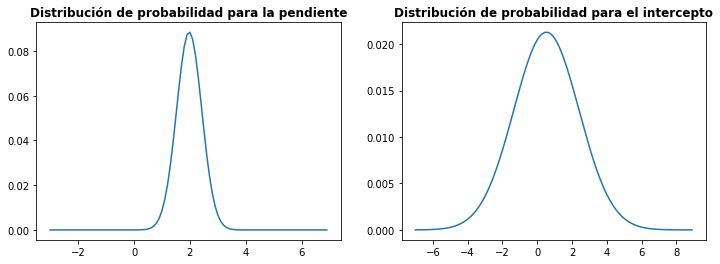

In [13]:
prob_m2 = like2.sum(axis=0)
prob_m2.size

prob_b2 = like2.sum(axis=1)
prob_b2.size


fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(m_list2,prob_m2)
plt.title("Distribución de probabilidad para la pendiente", fontweight="bold")

plt.subplot(1,2,2)
plt.plot(b_list2,prob_b2)
plt.title("Distribución de probabilidad para el intercepto", fontweight="bold")

### QUÉ BELLEZA!!!